In [ ]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


json_file = 'PPO_flattened_c92c7acb-b100-41f3-b6ba-063ae4d16c54'

log_dir = Path.cwd() / "json_training_logs"
log_dir.mkdir(parents=True, exist_ok=True)  # ensure directory exists
filepath = log_dir / json_file\

print(filepath)


In [ ]:
# Load training log
def load_training_log(filepath=filepath):
    filepath = Path.cwd() / filepath
    with open(filepath, "r") as f:
        return json.load(f)

load_training_log(filepath)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_training_progression(data, episode_for_actions=1):
    episodes = [d["episode_number"] for d in data]
    final_pnls = [d["final_pnl"] for d in data]
    buy_and_hold = [d["buy_and_hold_pnl"] for d in data]
    max_drawdowns = [d["max_drawdown"] for d in data]
    sharpe_ratios = [d["sharpe_ratio"] for d in data]

    # Create 2-row figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios':[2,1]})
    
    # --- Top subplot: metrics ---
    ax1.plot(episodes, final_pnls, marker='o', label='Final PnL')
    ax1.plot(episodes, buy_and_hold, marker='o', label='Buy & Hold PnL')
    ax1.plot(episodes, max_drawdowns, marker='o', label='Max Drawdown')

    ax1.set_xlabel('Episode')
    ax1.set_ylabel('PnL / Drawdown')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Secondary y-axis for Sharpe ratio
    ax1b = ax1.twinx()
    ax1b.plot(episodes, sharpe_ratios, marker='x', color='orange', label='Sharpe Ratio')
    ax1b.set_ylabel('Sharpe Ratio')
    ax1b.legend(loc='upper right')

    # --- Bottom subplot: action probabilities ---
    ep_data = next((d for d in data if d["episode_number"] == episode_for_actions), None)
    if ep_data and "action_probs" in ep_data:
        steps = np.arange(len(ep_data["action_probs"]))
        probs = np.array(ep_data["action_probs"]).T  # shape: (3, steps)
        action_names = ["Action 0", "Action 1", "Action 2"]
        for i in range(3):
            ax2.plot(steps, probs[i], label=action_names[i])
        ax2.set_xlabel('Step')
        ax2.set_ylabel('Probability')
        ax2.set_title(f'Action Probabilities (Episode {episode_for_actions})')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


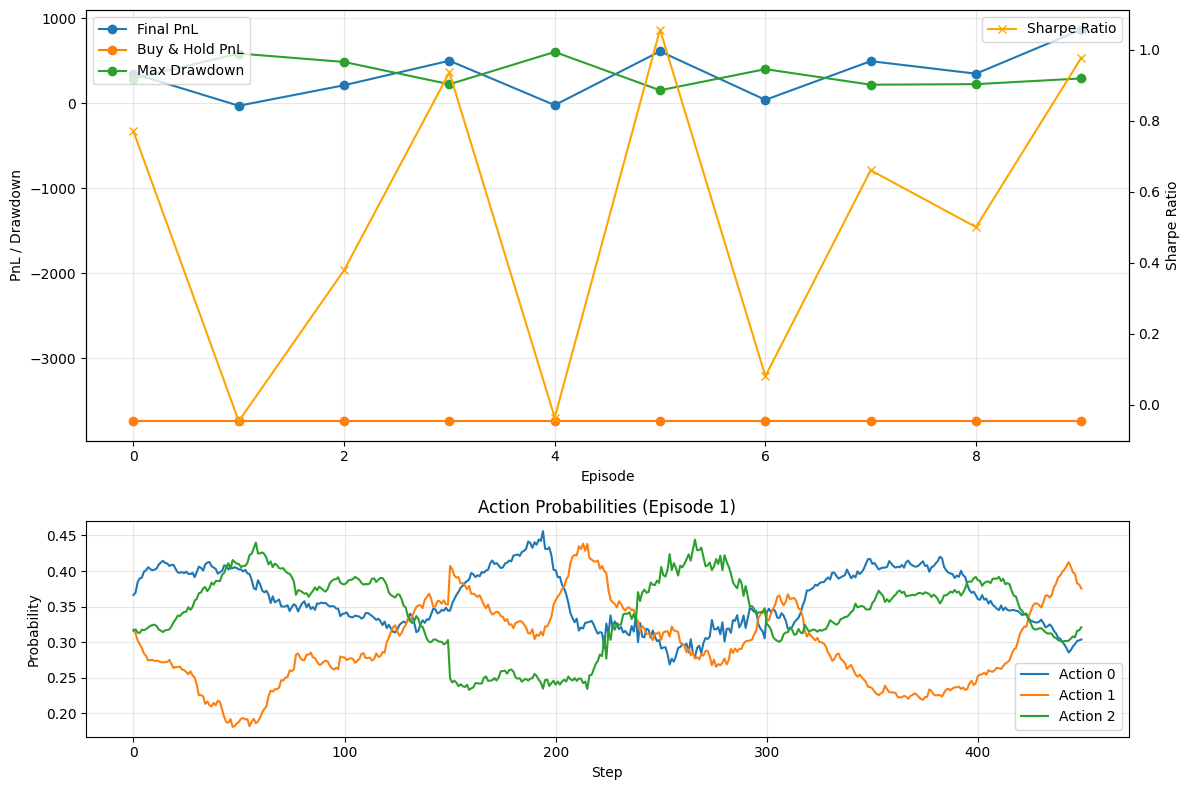

In [6]:
# Example usage inside Jupyter
data = load_training_log()
visualize_training_progression(data, episode_for_actions=1)